<a href="https://colab.research.google.com/github/lokeshparab/COVID-19-Vaccination-Analysis-/blob/main/COVID_19_Vaccination_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do not delete any row from this dataset

### Write df = df.fillna(0) instead

In [2]:
import pandas as pd
import requests
import io
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
url = "https://raw.githubusercontent.com/AshishJangra27/Data-Science-with-Python-Course-ETG/main/COVID%20Data%20Analysis%20Assignment/country_vaccinations.csv"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode("utf-8")))

In [4]:
df = df.fillna(0)

In [5]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [6]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [7]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands', 'Chile', 'China',
       'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada',
       'Guatemala', 'G

## Q1. Total number of people vaccinated in Argentina (Atlease Once)

In [8]:
df[ df['country']=='Argentina' ]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
495,Argentina,ARG,2020-12-29,700.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
496,Argentina,ARG,2020-12-30,0.0,0.0,0.0,0.0,15656.0,0.00,0.00,0.00,346.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
497,Argentina,ARG,2020-12-31,32013.0,0.0,0.0,0.0,15656.0,0.07,0.00,0.00,346.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
498,Argentina,ARG,2021-01-01,0.0,0.0,0.0,0.0,11070.0,0.00,0.00,0.00,245.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
499,Argentina,ARG,2021-01-02,0.0,0.0,0.0,0.0,8776.0,0.00,0.00,0.00,194.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,Argentina,ARG,2021-05-01,7971470.0,7002992.0,968478.0,106257.0,136313.0,17.64,15.49,2.14,3016.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
619,Argentina,ARG,2021-05-02,7997902.0,7025492.0,972410.0,26432.0,123279.0,17.70,15.54,2.15,2728.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
620,Argentina,ARG,2021-05-03,8039793.0,7051772.0,988021.0,41891.0,117870.0,17.79,15.60,2.19,2608.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
621,Argentina,ARG,2021-05-04,8197011.0,7149293.0,1047718.0,157218.0,115766.0,18.14,15.82,2.32,2561.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


In [9]:
people_vaccinated = max(df[ df['country']=='Argentina' ]['people_vaccinated'])

In [10]:
date = df[ df['country']=='Argentina' ][df['people_vaccinated']== people_vaccinated]['date']

In [11]:
date = np.array(date)[0]

In [12]:
print(people_vaccinated,"number of people vaccinated in Argentina till date",date)

7261176.0 number of people vaccinated in Argentina till date 2021-05-05


## Q2. Total number of countries in this dataset

In [ ]:
len(df['country'].unique())

195

## Q3. Maximum number of people vaccinated in a country

In [19]:
df.groupby('country').max()['people_vaccinated'].sort_values(ascending=False)

country
United States                       148562891.0
India                               129730641.0
United Kingdom                       34795074.0
Brazil                               30921100.0
England                              29124310.0
                                       ...     
China                                       0.0
Saudi Arabia                                0.0
Samoa                                       0.0
Ethiopia                                    0.0
Saint Vincent and the Grenadines            0.0
Name: people_vaccinated, Length: 195, dtype: float64

## Q4. Top 5 Countries in terms of number of people vaccinated

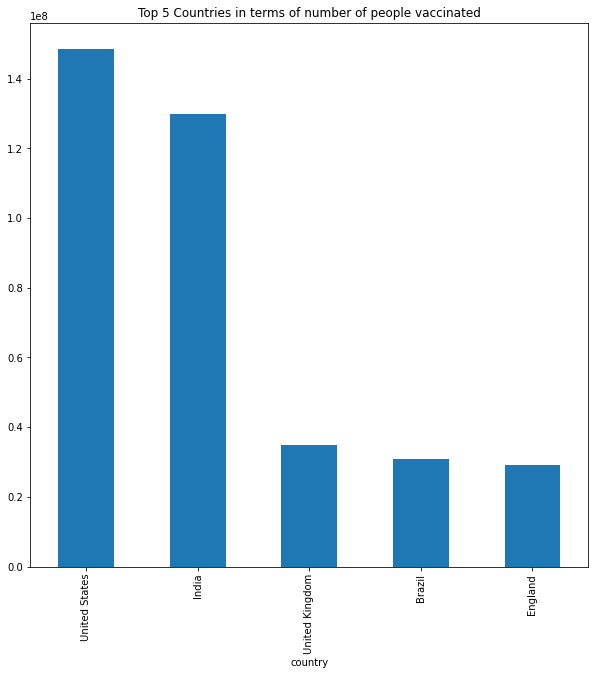

In [20]:
d1 = df.groupby('country').max()['people_vaccinated'].sort_values(ascending=False).head()
d1.plot(x = 'Country', y = 'People vacinated',title='Top 5 Countries in terms of number of people vaccinated', kind = 'bar', figsize=(10,10))